In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/asarfraaz/PyPractice/master/data/Emp_Attrition.csv")
df

,EmpId,Age,Team,Rating,Status
0,2763,44,Test,6.0,Quit
1,3746,24,Test,8.0,Stay
2,2387,24,Dev,9.5,Stay
3,9474,43,Test,9.0,Stay
4,3728,32,Test,7.0,Stay
5,7363,42,Test,4.5,Stay
6,6346,33,Dev,4.5,Quit
7,9478,39,Dev,8.0,Quit
8,6353,28,Dev,9.0,Quit
9,5467,36,Dev,9.5,Quit


In [ ]:
df.shape

(20, 5)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EmpId   20 non-null     int64  
 1   Age     20 non-null     int64  
 2   Team    20 non-null     object 
 3   Rating  20 non-null     float64
 4   Status  20 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 928.0+ bytes


# how many going to quit and how many going to stay

In [ ]:
df.groupby('Status').agg({'count'})

,EmpId,Age,Team,Rating
,count,count,count,count
Status,,,,
Quit,10,10,10,10
Stay,10,10,10,10


In [ ]:
df.Status.value_counts()

Quit    10
Stay    10
Name: Status, dtype: int64

# if i only know the employee id than what is the probability that someone going to quit

In [ ]:
prob_quit = 10/20
prob_quit

0.5

In [ ]:
df.columns

Index(['EmpId', 'Age', 'Team', 'Rating', 'Status'], dtype='object')

In [ ]:
sorted(df['Age'].unique())

[24, 27, 28, 29, 31, 32, 33, 36, 37, 39, 41, 42, 43, 44, 46]

#lets assume threshold for age is 30

In [ ]:
less_30 = df[df['Age']<30]
less_30

,EmpId,Age,Team,Rating,Status
1,3746,24,Test,8.0,Stay
2,2387,24,Dev,9.5,Stay
8,6353,28,Dev,9.0,Quit
11,5367,27,Test,8.5,Stay
12,2736,29,Test,8.0,Stay
15,2376,27,Dev,9.0,Stay
17,8237,29,Dev,9.5,Quit
18,2327,29,Dev,7.0,Stay


In [ ]:
less_30.shape[0]

8

#what is the prob of someone going to quit if age is less than 30

In [ ]:
less_30.Status.value_counts()

Stay    6
Quit    2
Name: Status, dtype: int64

In [ ]:
less_30_quit = 2/8
less_30_quit

0.25

# if arjun is an emp
- we know only his emp id
- Probability of arjun quit = 0.5
- if we gave age column and his age is 27 than prob of quit = 0.25

In [ ]:
great_30 = df[df['Age']>=30]
great_30.Status.value_counts()

Quit    8
Stay    4
Name: Status, dtype: int64

In [ ]:
great_30_quit = 8/12
great_30_quit

0.6666666666666666

In [ ]:
r = range(10)
r

range(0, 10)

In [ ]:
a = sum(r)
a

45

# lets take rating column, threshold for rating is 7

In [ ]:
less_7 =df[df['Rating']<7]
less_7.Status.value_counts()

Quit    4
Stay    2
Name: Status, dtype: int64

In [ ]:
less_7_quit = 4/6
less_7_quit

0.6666666666666666

In [ ]:
more_7 =df[df['Rating']>=7]
more_7.Status.value_counts()

Stay    8
Quit    6
Name: Status, dtype: int64

In [ ]:
great_7 = 6/14
great_7

0.42857142857142855

In [ ]:
df['Team'].unique()

array(['Test', 'Dev'], dtype=object)

In [ ]:
team_dev = df[df['Team']=='Dev']
team_dev.Status.value_counts()

Quit    7
Stay    3
Name: Status, dtype: int64

In [ ]:
team_dev_quit = 7/10
team_dev_quit

0.7

In [ ]:
team_test = df[df['Team']=='Test']
team_test.Status.value_counts()

Stay    7
Quit    3
Name: Status, dtype: int64

In [ ]:
team_test_quit = 3/10
team_test_quit

0.3

In [ ]:
less_30_quit,great_30_quit,less_7_quit,great_7,team_dev_quit,team_test_quit

(0.25, 0.6666666666666666, 0.6666666666666666, 0.42857142857142855, 0.7, 0.3)

# team_dev_quit gives max value(0.7)
- team is the best feature to decide quit

# Ideal split: this is based on cretiria that will give me pure **Node**
- pure node means all entries in that node match the target label
- it is also called homogenous group

In [ ]:
team_age_df = df[(df['Team']=='Dev') & (df['Age']>=30)]
team_age_df.Status.value_counts()

Quit    5
Name: Status, dtype: int64

In [ ]:
rating_age_df = df[(df['Rating']<7) & (df['Age']>=30)]
rating_age_df.Status.value_counts()

Quit    4
Stay    2
Name: Status, dtype: int64

In [ ]:
rating_age_df = df[(df['Rating']<7) & (df['Age']>=30) & (df['Team']=='Dev')]
rating_age_df.Status.value_counts()

Quit    1
Name: Status, dtype: int64

# Gini Impurity calculation


# Creteria 1: age >=30

In [ ]:
age_30 = df[df['Age']>=27.5]
age_30

,EmpId,Age,Team,Rating,Status
0,2763,44,Test,6.0,Quit
3,9474,43,Test,9.0,Stay
4,3728,32,Test,7.0,Stay
5,7363,42,Test,4.5,Stay
6,6346,33,Dev,4.5,Quit
7,9478,39,Dev,8.0,Quit
8,6353,28,Dev,9.0,Quit
9,5467,36,Dev,9.5,Quit
10,8372,37,Test,5.5,Stay
12,2736,29,Test,8.0,Stay


In [ ]:
len(age_30)

16

In [ ]:
age_30.Status.value_counts()

Quit    10
Stay     6
Name: Status, dtype: int64

In [ ]:
pq = 10/16
pnq = 6/16

In [ ]:
gimp_age_ge30 = 1-(pq**2+pnq**2)
gimp_age_ge30

0.46875

In [ ]:
age_lt30 = df[df['Age']<27.5]

In [ ]:
len(age_lt30)

4

In [ ]:
age_lt30.Status.value_counts()

Stay    4
Name: Status, dtype: int64

In [ ]:
pq = 0/4
pnq = 4/4

In [ ]:
gimp_age_lt30 = 1-(pq**2+pnq**2)
gimp_age_lt30

0.0

In [ ]:
wt_gimp_age30 = (16/20)*gimp_age_ge30 + (4/20)*gimp_age_lt30
wt_gimp_age30

0.375

# split based on team = dev 
# split based on rating > 7

- wt_gimp_age30
- wt_gimp_teamDev
- wt_gimp_rat7

- min of above 3 is the best conditio to split the root node

In [ ]:
df_dev = df[df['Team']=='Dev']
df_dev.Status.value_counts()

Quit    7
Stay    3
Name: Status, dtype: int64

In [ ]:
pq= 7/10
pnq= 3/10

In [ ]:
gimp_team_dev = 1-(pq**2+pnq**2)
gimp_team_dev

0.42000000000000004

In [ ]:
df_test = df[df['Team']=='Test']
df_test.Status.value_counts()

Stay    7
Quit    3
Name: Status, dtype: int64

In [ ]:
pq= 3/10
pnq =7/10

In [ ]:
gimp_team_test = 1-(pq**2+pnq**2)
gimp_team_test

0.42000000000000004

In [ ]:
wt_gimp_test = (10/20)*gimp_team_dev+(10/20)*gimp_team_test
wt_gimp_test

0.42000000000000004

In [ ]:
df_Rate_ge7 = df[df['Rating']>7]
df_Rate_ge7.Status.value_counts()

Stay    6
Quit    5
Name: Status, dtype: int64

In [ ]:
pq = 5/11
pnq = 6/11

In [ ]:
gimp_rate_ge7 = 1-(pq**2+pnq**2)
gimp_rate_ge7

0.49586776859504145

In [ ]:
df_rate_lt7 = df[df['Rating']<=7]
df_rate_lt7.Status.value_counts()

Quit    5
Stay    4
Name: Status, dtype: int64

In [ ]:
pq = 5/9
pnq = 5/9

In [ ]:
gimp_rate_lt7 = 1-(pq**2+pnq**2)
gimp_rate_lt7

0.382716049382716

In [ ]:
wt_gimp_rate7 = (11/20)*gimp_rate_ge7+(9/20)*gimp_rate_lt7
wt_gimp_rate7

0.444949494949495

In [ ]:
wt_gimp_age30,wt_gimp_rate7,wt_gimp_test

(0.4166666666666667, 0.444949494949495, 0.42000000000000004)

# Age is the best feature to select root node

In [ ]:
df.head()

,EmpId,Age,Team,Rating,Status
0,2763,44,Test,6.0,Quit
1,3746,24,Test,8.0,Stay
2,2387,24,Dev,9.5,Stay
3,9474,43,Test,9.0,Stay
4,3728,32,Test,7.0,Stay


In [ ]:
team_vals = dict(zip(df.Team.unique(),range(2)))
team_vals

{'Dev': 1, 'Test': 0}

In [ ]:
status_vals = dict(zip(df.Status.unique(),range(2)))
status_vals

{'Quit': 0, 'Stay': 1}

In [ ]:
emp_df = df.copy()

In [ ]:
emp_df['Team'] = emp_df.Team.map(team_vals)
emp_df['Status'] = emp_df.Status.map(status_vals)
emp_df.head()

,EmpId,Age,Team,Rating,Status
0,2763,44,0,6.0,0
1,3746,24,0,8.0,1
2,2387,24,1,9.5,1
3,9474,43,0,9.0,1
4,3728,32,0,7.0,1


# spliting into x and y

In [ ]:
X = emp_df.loc[:,'Age':'Rating']
y= emp_df.Status

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(X,y)

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

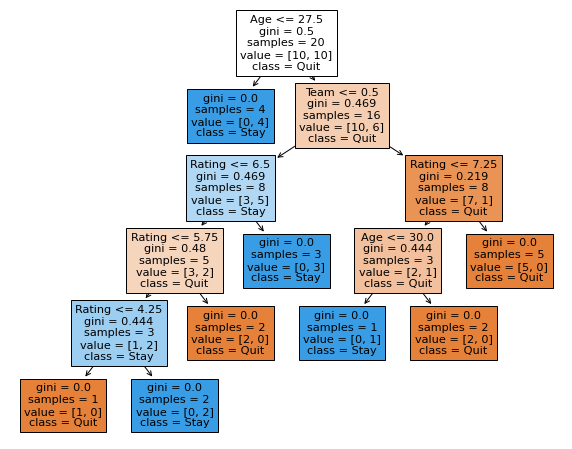

In [ ]:
plt.figure(figsize=(10,8))
plot_tree(dt_model,
          feature_names=X.columns.to_list(),
          class_names=list(status_vals.keys()),
          filled=True);

In [1]:
DecisionTreeClassifier?

Object `DecisionTreeClassifier` not found.
